In [1]:
#dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py

from plotly.graph_objs import *
from config import (mboxkey, plykey, plyname)

In [2]:
#read the csvs into a df
station_agi_df = pd.read_csv('Output/station_agi_df.csv')
nz_stn_agi_df = pd.read_csv('Output/nz_stn_agi_df.csv')
stn_agi_bin_df = pd.read_csv('Output/stn_agi_bin_df.csv')
state_inc_df = pd.read_csv('Output/Incentives by State.csv')
gas_df = pd.read_csv('Output/gas_df.csv')

## EV Stations and Ports vs AGI by Zip Code

### EV Charging Stations with Average AGI by Zip Code Scattermap

In [3]:
#make scattermap

#set up mapbox token
mapbox_access_token = mboxkey

#make variables
site_lat = nz_stn_agi_df['Stn Lat']
site_lon = nz_stn_agi_df['Stn Lng']
agi = nz_stn_agi_df['formatted_agi']
zip_code = nz_stn_agi_df['Zip Code']

#data
map_data = Data([
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            size=4,
            opacity=1,
            autocolorscale = False,
            colorscale = 'Portland',
            cmin = 25000,
            color = nz_stn_agi_df['Average AGI'],
            cmax = 150000,
            colorbar=dict(
                title="AGI"),
        ),
        text= 'AGI: '+ agi + ' | Zip Code: ' + zip_code.astype(str),
        hoverinfo='text'
    )]
)

#layout
map_layout = Layout(
    title='EV Charging Stations with Average AGI by Zip Code <br> (Hover for Average AGI)',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

#figure
fig = dict(data=map_data, layout=map_layout)

#plot
py.iplot(fig, filename='AGI Map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~VanessaVanG/0 or inside your plot.ly account where it is named 'AGI Map'


### Number of EV Stations by Income Range Strip Plot

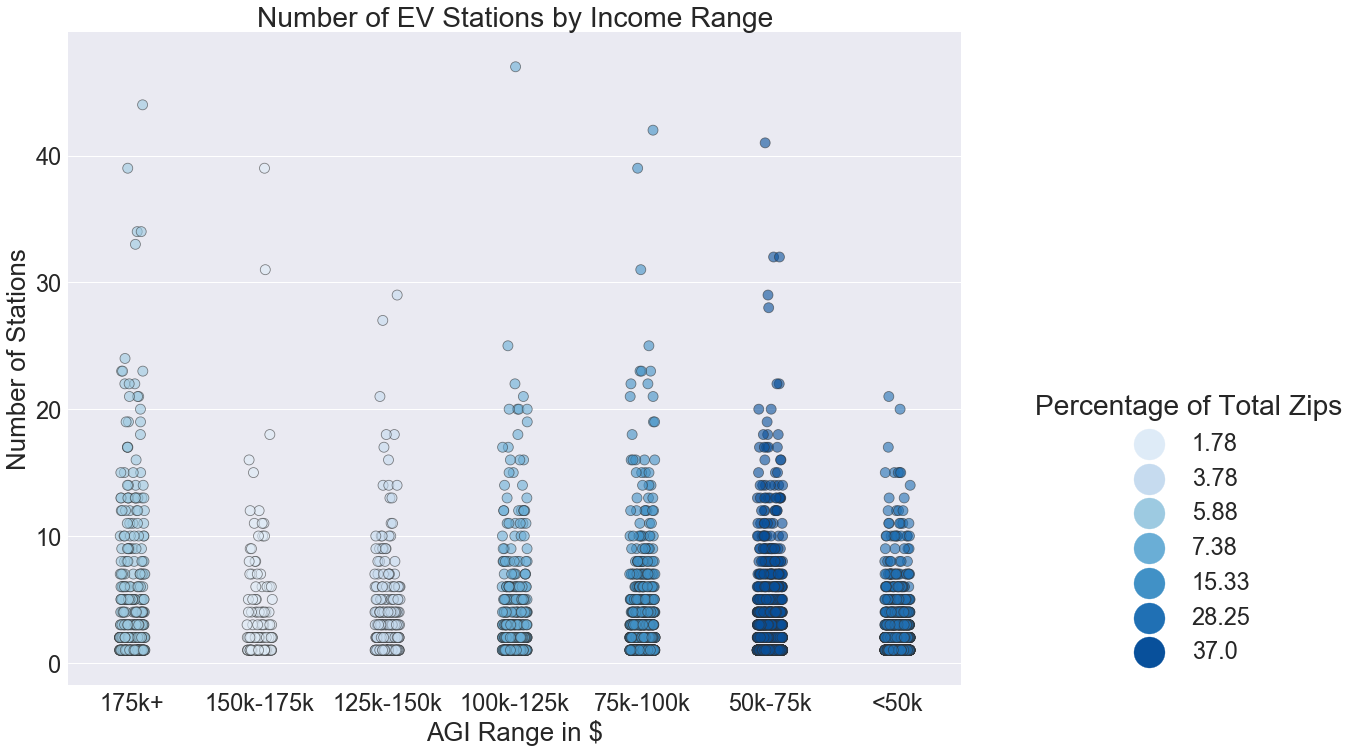

In [4]:
#plot
plt.figure(figsize=(16,12))

sns.set(font_scale=2.35)

nd = np.arange(6)
width=0.5
sns.stripplot(x="AGI Range", y="Number of Stations", data=stn_agi_bin_df, palette="Blues", hue="Percentage of Total Zips", jitter=True, s=10, edgecolors="k", linewidth=.8, alpha=.6)
 
#make legend
plt.legend(loc='lower right', markerscale=4, title='Percentage of Total Zips', bbox_to_anchor=(1.45, 0))
 
#make titles
plt.xlabel('AGI Range in $')
plt.ylabel('Number of Stations')
plt.title('Number of EV Stations by Income Range')

plt.show()

## EV Stations and Ports vs Incentives by State

### State Incentives Choropleth

In [5]:
#make variables
incentives = (state_inc_df['Number of Incentives'].astype(int)).astype(str)
stations = state_inc_df['Number of Stations'].astype(str)
ports = (state_inc_df['Number of Connectors'].astype(int)).astype(str)

#data
inc_data = [ dict(
        type='choropleth',
        colorscale = 'Greens',
        autocolorscale = False,
        reversescale = True,
        locations = state_inc_df['State'],
        z = state_inc_df['Number of Incentives'],
        locationmode = 'USA-states',
        text = 'State: ' + state_inc_df['State'] + '<br>' 
                + 'Incentives: ' + incentives + '<br>' 
                + 'Stations: ' + stations+ '<br>' 
                + 'Connector Ports: ' + ports,
        hoverinfo='text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = 'Number of EV Incentives' + '<br>' + 'by State'),
        zmin = 1,
        zmax = 20
        ),
        
        #make another layer to show number of stations and ports
        dict(
        type = 'scattergeo',
        locations = state_inc_df['State'],
        locationmode = 'USA-states',
        text = 'S: ' + stations + '<br>' +  'P: ' + ports,
        mode = 'text',
        hoverinfo = 'none',
        textfont = dict(color=state_inc_df['text_color'])        
        )
       ]

inc_layout = dict(
        title = 'State EV Incentives with Number of Stations and Connector Ports',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=inc_data, layout=inc_layout )
py.iplot( fig, filename='EV_Incentives' )

### EV Stations vs Incentives Regression Plot

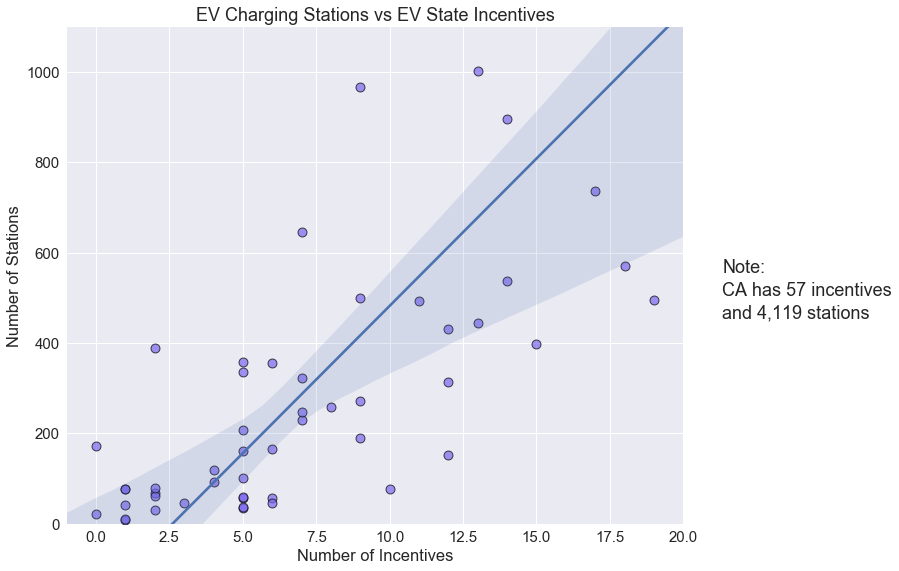

In [6]:
#make the font scale larger
sns.set(font_scale=1.5)

#make the plot
incentives_plot = sns.lmplot(x='Number of Incentives', y='Number of Stations', data=state_inc_df, 
                         fit_reg=True, scatter_kws={'s': 80, 'alpha':0.7, 'linewidths':1, 'color':'mediumslateblue','edgecolor':'k'},
                         size=8, aspect=1.25)

#change the x & y axes 
plt.xlim(-1, 20)
plt.ylim(0, 1100)

#set the title
plt.title('EV Charging Stations vs EV State Incentives')

#make a note on the side
incentives_plot.fig.text(1.02, .54, 'Note:')
incentives_plot.fig.text(1.02, .5, 'CA has 57 incentives')
incentives_plot.fig.text(1.02, .46, 'and 4,119 stations')

#save as a png
incentives_plot.savefig('Output/stations_vs_incentives.png')
                         
plt.show()

### EV Ports vs Incentives Regression Plot

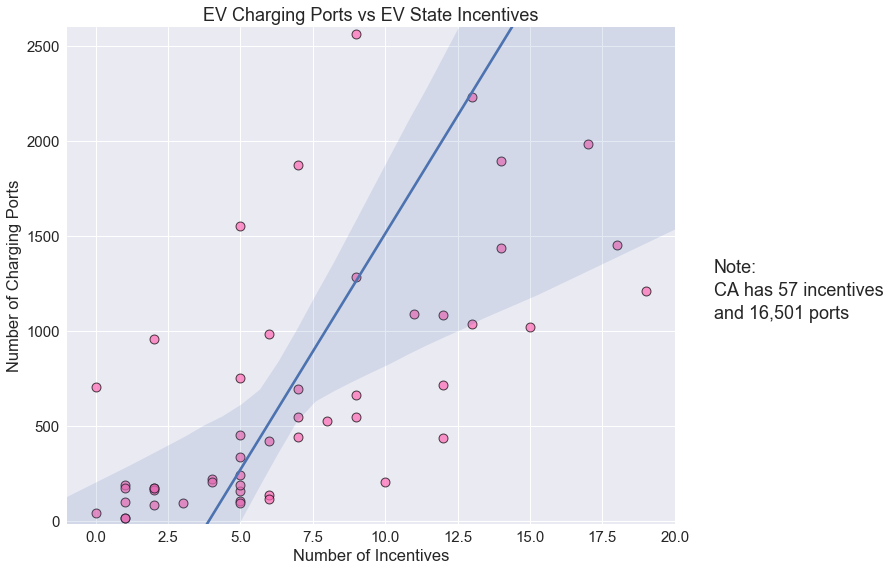

In [7]:
#make the font scale larger
sns.set(font_scale=1.5)

#make the plot
inc_port_plot = sns.lmplot(x='Number of Incentives', y='Number of Connectors', data=state_inc_df, 
                         fit_reg=True, scatter_kws={'s': 80, 'alpha':0.7, 'linewidths':1, 'color':'hotpink','edgecolor':'k'},
                         size=8, aspect=1.25)

#change the x & y axes 
plt.xlim(-1, 20)
plt.ylim(-15, 2600)
plt.ylabel('Number of Charging Ports')

#set the title
plt.title('EV Charging Ports vs EV State Incentives')

#make a note on the side
inc_port_plot.fig.text(1.02, .54, 'Note:')
inc_port_plot.fig.text(1.02, .5, 'CA has 57 incentives')
inc_port_plot.fig.text(1.02, .46, 'and 16,501 ports')

#save as a png
inc_port_plot.savefig('Output/ports_vs_incentives.png')
                         
plt.show()

## EV Stations and Ports vs Gasoline Taxes by State

### State Gasoline Taxes Choropleth

In [8]:
#make variables for the text portion
tax = gas_df['State Tax'].astype(str)
station = gas_df['Number of Stations'].astype(str)
port = (gas_df['Number of Connectors'].astype(int)).astype(str)

#data
gas_data = [ dict(
        type='choropleth',
        colorscale = 'YlOrRd',
        autocolorscale = False,
        reversescale = True,
        locations = gas_df['State'],
        z = gas_df['State Tax'].astype(float),
        locationmode = 'USA-states',
        text = 'State: ' + gas_df['State'] + '<br>' 
                + 'Gas Tax: ' + tax + '<br>' 
                + 'Stations: ' + stations+ '<br>' 
                + 'Connector Ports: ' + ports,
        hoverinfo='text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = 'State Gas Taxes' + '<br>' + 'in $'),
        ),
            
        #add another layer for number of stations and ports
        dict(
        type = 'scattergeo',
        locations = gas_df['State'],
        locationmode = 'USA-states',
        text = 'S: ' + stations + '<br>' +  'P: ' + ports,
        mode = 'text',
        hoverinfo = 'none',
        textfont = dict(color=gas_df['text_color'])
        )
       ]

gas_layout = dict(
        title = 'State Gasoline Taxes and Fees with' + '<br>' 
                + 'Number of Stations and Connector Ports',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data =gas_data, layout = gas_layout )
py.iplot( fig, filename='EV_Tax' )

### EV Stations vs State Gasoline Tax Regression Plot

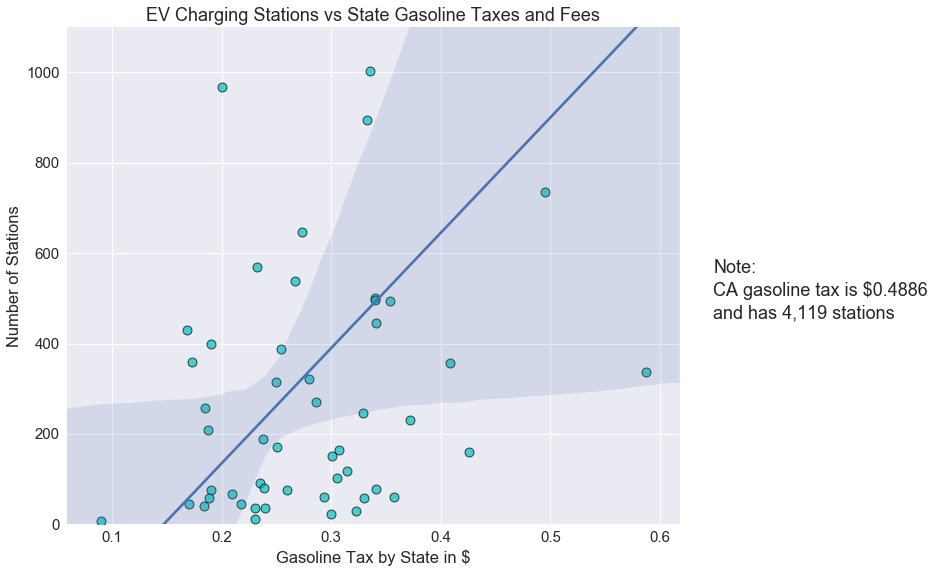

In [9]:
#make the font scale larger
sns.set(font_scale=1.5)

#make the plot
tax_stn_plot = sns.lmplot(x='State Tax', y='Number of Stations', data=gas_df, 
                         fit_reg=True, scatter_kws={'s': 80, 'alpha':0.7, 'linewidths':1, 'color':'c','edgecolor':'k'},
                         size=8, aspect=1.25)

#change the x and y axes 
plt.ylim(0, 1100)
plt.xlabel('Gasoline Tax by State in $')

#set the title
plt.title('EV Charging Stations vs State Gasoline Taxes and Fees')

#make a note on the side
tax_stn_plot.fig.text(1.02, .54, 'Note:')
tax_stn_plot.fig.text(1.02, .5, 'CA gasoline tax is $0.4886')
tax_stn_plot.fig.text(1.02, .46, 'and has 4,119 stations')

#save as a png
tax_stn_plot.savefig('Output/stations_vs_tax.png')
                         
plt.show()

### EV Ports vs State Gasoline Tax Regression Plot

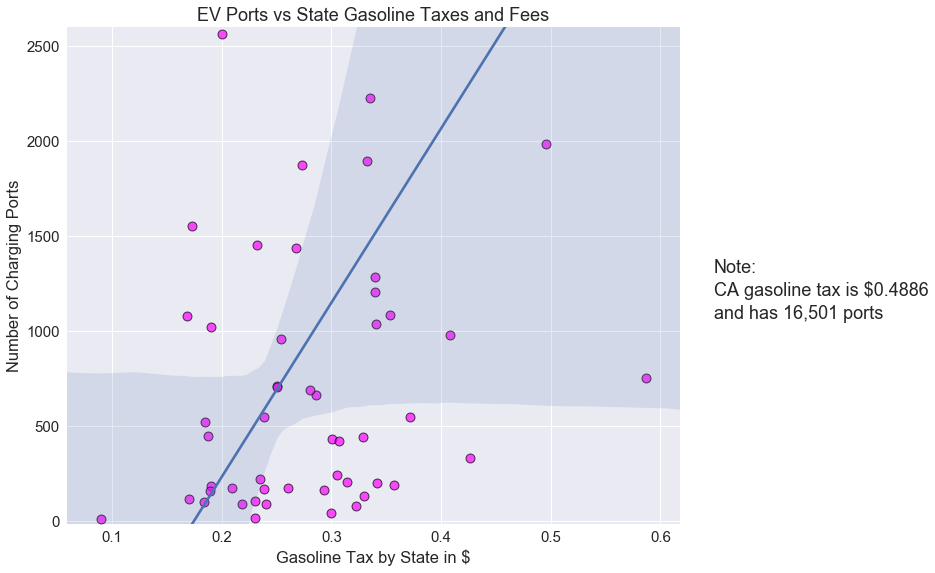

In [11]:
#make the font scale larger
sns.set(font_scale=1.5)

#make the plot
tax_port_plot = sns.lmplot(x='State Tax', y='Number of Connectors', data=gas_df, 
                         fit_reg=True, scatter_kws={'s': 80, 'alpha':0.7, 'linewidths':1, 'color':'fuchsia','edgecolor':'k'},
                         size=8, aspect=1.25)

#change the x and y axes 
plt.ylim(-15, 2600)
plt.ylabel('Number of Charging Ports')
plt.xlabel('Gasoline Tax by State in $')

#set the title
plt.title('EV Ports vs State Gasoline Taxes and Fees')

#make a note on the side
tax_port_plot.fig.text(1.02, .54, 'Note:')
tax_port_plot.fig.text(1.02, .5, 'CA gasoline tax is $0.4886')
tax_port_plot.fig.text(1.02, .46, 'and has 16,501 ports')

#save as a png
tax_port_plot.savefig('Output/ports_vs_tax.png')
                         
plt.show()